In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#  get csv file
fortune_df = pd.read_csv('fortune1000.csv')
fortune_df.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [3]:
# get detail about data
fortune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
Rank         1000 non-null int64
Company      1000 non-null object
Sector       1000 non-null object
Industry     1000 non-null object
Location     1000 non-null object
Revenue      1000 non-null int64
Profits      1000 non-null int64
Employees    1000 non-null int64
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


# Visualization using Matplotlib

In [4]:
# Graph between top10 company revenue graph(line chart, bar plot, histograph,pie plot)
cos = fortune_df['Company'][0:10]
rev = fortune_df['Revenue'][0:10]

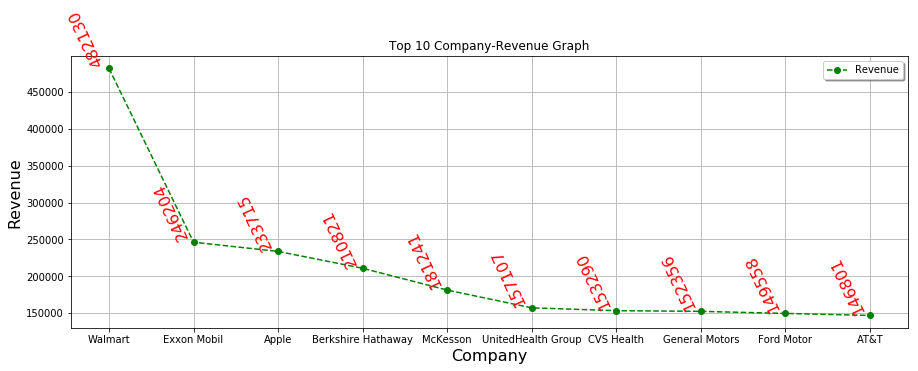

In [5]:
# increase graph size
plt.figure(figsize=(15,5))
# set x label, y label and title 
plt.xlabel('Company',fontsize= 16)
plt.ylabel('Revenue',fontsize= 16)
plt.title('Top 10 Company-Revenue Graph')
for index,name in enumerate(rev):
    plt.text(index-0.2,rev[index],name,fontsize=16,rotation=115,rotation_mode='anchor',horizontalalignment='left',verticalalignment='top', color='r',clip_on=False

)
# Format graph line
plt.plot(cos,rev,color='green', marker='o', linestyle='dashed',label="Revenue")
plt.legend(loc = 'best',shadow="True")
# To show grid
plt.grid()
# Inference: Ranking is based on Revenue

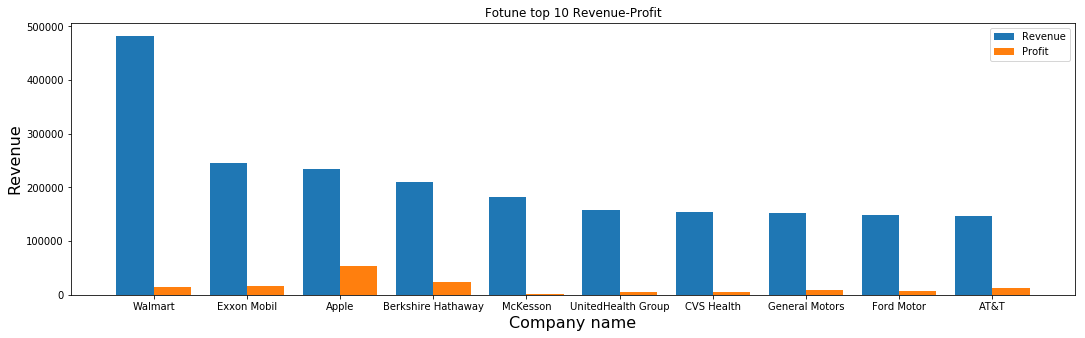

In [6]:
# bar chart of revenue, profit and company
xpos = np.arange(10)
# added profit to get two barchart in one plot
profit = fortune_df['Profits'][0:10]
# Increse default figure size
plt.figure(figsize=(18,5))
plt.xticks(xpos,cos)
plt.ylabel('Revenue',fontsize= 16)
plt.xlabel('Company name',fontsize=16)
plt.title('Fotune top 10 Revenue-Profit')
# adjusting xpos so that revenue and profit come side by side
plt.bar(xpos-0.2,rev,label="Revenue",width=0.4)
plt.bar(xpos+0.2,profit,label="Profit",width=0.4)
plt.legend()
plt.show()

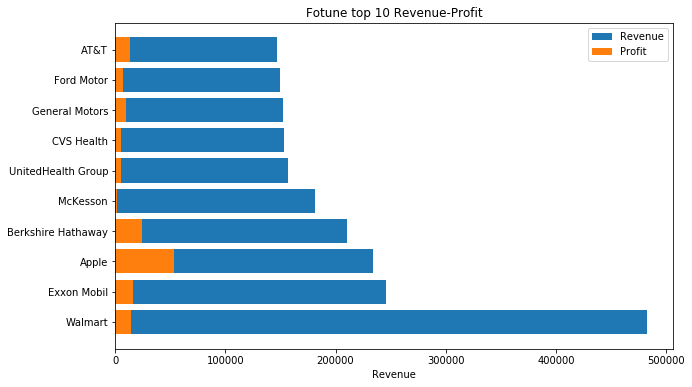

In [7]:
# horizontal bar graph
plt.figure(figsize=(10,6))
plt.yticks(xpos,cos)
plt.xlabel('Revenue')
plt.title('Fotune top 10 Revenue-Profit')
plt.barh(xpos,rev, label="Revenue")
plt.barh(xpos,profit, label="Profit")
plt.legend()
plt.show()

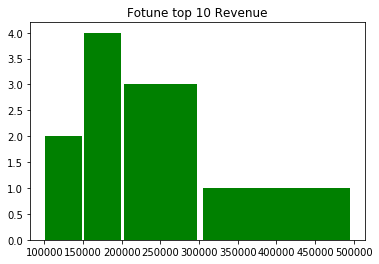

In [8]:
# Revenue histograph for revenue 
plt.title('Fotune top 10 Revenue')
plt.hist(rev,bins=[100000,150000,200000,300000,500000],rwidth=0.95,color='g')
plt.show()

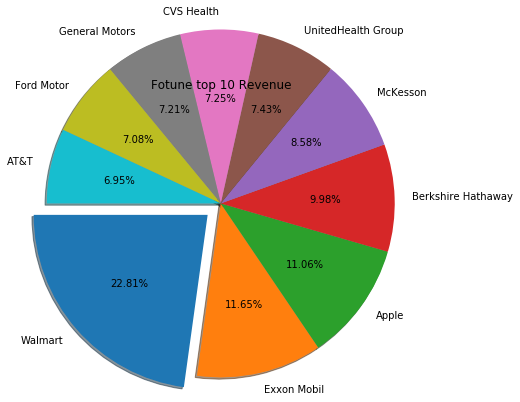

In [9]:
# Pie chart
explodeArray=[0.2,0,0,0,0,0,0,0,0,0]
# to make make pie chart in circle shape
plt.axis("equal")
plt.title('Fotune top 10 Revenue')
plt.pie(rev,labels=cos,radius=2,autopct="%0.2f%%",shadow=True,explode=explodeArray,startangle=180)
plt.show()
# to save pie chart in system
# plt.savefig("piechart.png",bbox_inches="tight")

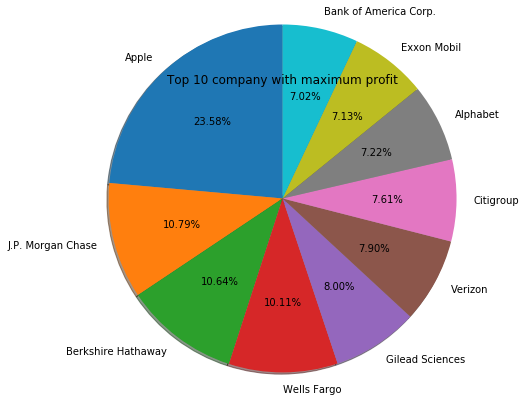

In [10]:
#  Top 10 company with maximum profit
plt.axis("equal")
plt.title('Top 10 company with maximum profit')
max_profit_list = fortune_df.sort_values(by=['Profits'],ascending=False)[0:10]
plt.pie(max_profit_list['Profits'],labels=max_profit_list['Company'],radius=2,autopct="%0.2f%%",shadow=True,startangle=90)
plt.show()

In [14]:
sectorGroup = fortune_df.groupby('Sector')
# Get length of groups
# sectorGroup.ngroups 
# or
totalSector = len(sectorGroup)
print(totalSector)

21


In [15]:
RevenueSum = sectorGroup['Revenue'].sum()
company_in_each_sector = sectorGroup['Company'].count()
cos_num = np.arange(21) 

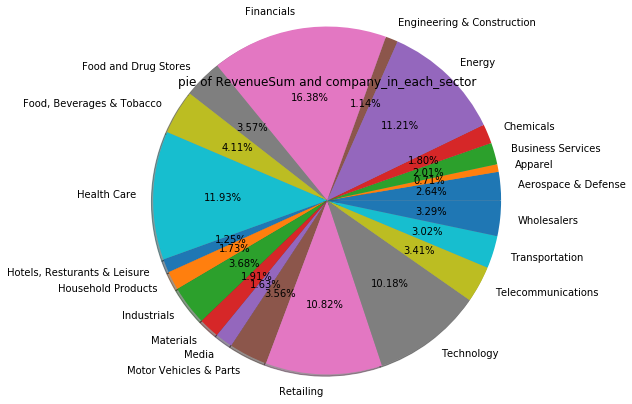

In [16]:
# pie of RevenueSum and company_in_each_sector
# plt.figure(figsize=(25,5))
plt.title("pie of RevenueSum and company_in_each_sector")
plt.axis("equal")
plt.xticks(cos_num,sectorGroup.groups.keys())
plt.pie(RevenueSum,labels=sectorGroup.groups.keys(),radius=2,autopct="%0.2f%%",shadow=True)
plt.show()

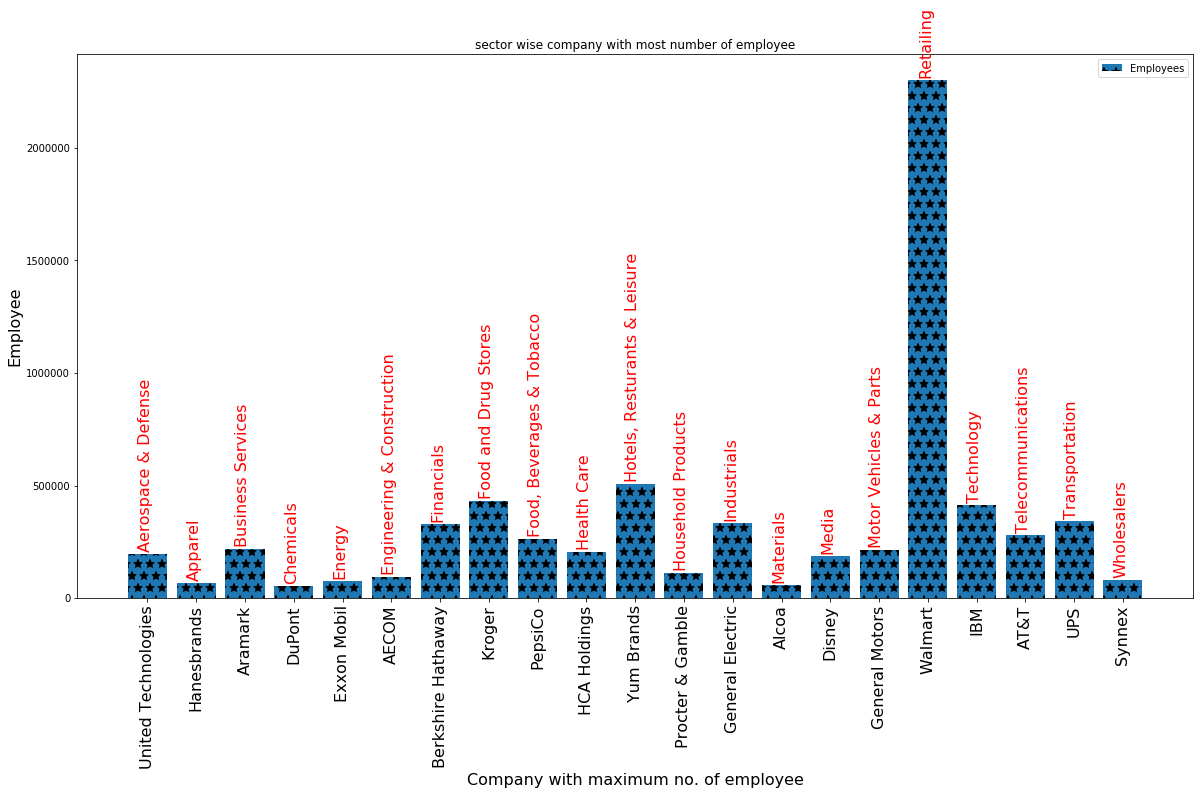

In [17]:
#sector wise company with most number of employee
listofcos = sectorGroup.apply(lambda x: x[x['Employees'] == x['Employees'].max()])
sectorName = sectorGroup.apply(lambda x: x.name) 
plt.figure(figsize=(20,10))
cpos = np.arange(len(listofcos))
plt.xticks(cpos,listofcos['Company'],rotation=90,fontsize=16)
plt.xlabel('Company with maximum no. of employee',fontsize=16)
plt.ylabel('Employee',fontsize=16)
plt.title('sector wise company with most number of employee')
for index,name in enumerate(sectorName):
    plt.text(index-0.2,listofcos['Employees'][index] + 10000,name,fontsize=16,rotation=90,rotation_mode='anchor',horizontalalignment='left',verticalalignment='top', color='r',clip_on=False

)
plt.bar(cpos,listofcos['Employees'],label="Employees",hatch='*')
plt.legend()
plt.show()

In [18]:
location_group = fortune_df.groupby('Location')
location_withmax_no_of_companies = location_group.size().sort_values(ascending = False)[:10]

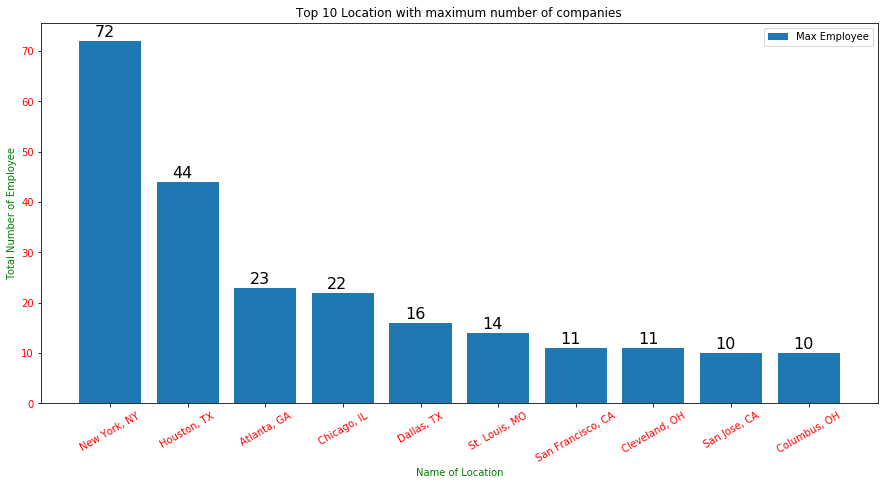

In [19]:
# plot using matplot
lpos = np.arange(10)
plt.figure(figsize=(15,7))
plt.title('Top 10 Location with maximum number of companies')
plt.ylabel('Total Number of Employee',color='g')
plt.xlabel('Name of Location',color='g')
plt.yticks(color='r')
plt.xticks(lpos,location_withmax_no_of_companies.index, rotation=30,color='r')
for index,val in enumerate(location_withmax_no_of_companies):
    plt.text(index-0.2,location_withmax_no_of_companies[index]+3.2,val,fontsize=16,rotation=0,horizontalalignment='left',verticalalignment='top', color='black',clip_on=False
)
plt.bar(lpos,location_withmax_no_of_companies,label="Max Employee")
plt.legend()
plt.show()

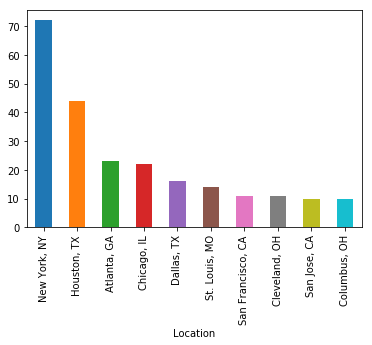

In [21]:
location_withmax_no_of_companies.plot.bar()
plt.show()

## Visualization using Seaborn

If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too

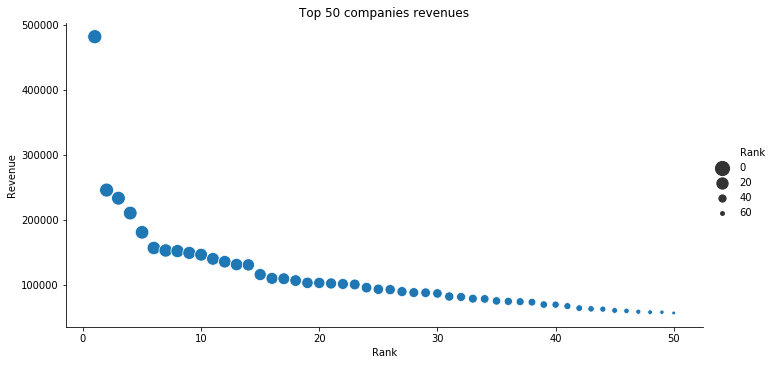

In [28]:
# Visualizing statistical relationships
top_50_companies = fortune_df[0:50]
# for index,name in enumerate(top_50_companies['Company']):
# #     print(top_50_companies['Revenue'][index])
#     plt.text(index,index,name,fontsize=16,rotation=115,rotation_mode='anchor',horizontalalignment='left',verticalalignment='top', color='r',clip_on=False
# )
# fig,ax = plt.subplots()
ax = sns.relplot(x="Rank", y="Revenue",size="Rank", sizes=(200,15), data=top_50_companies,aspect=2);
plt.title('Top 50 companies revenues')
plt.show()

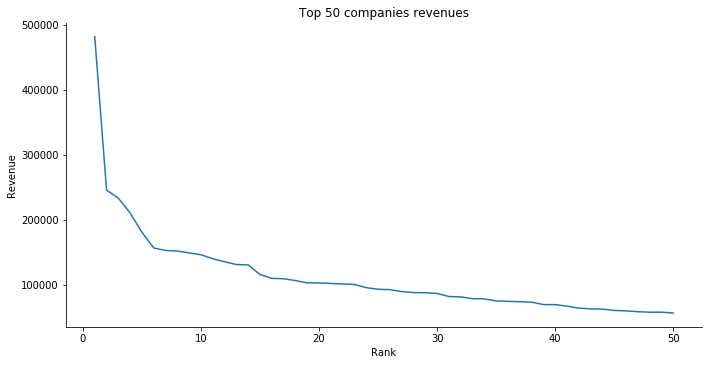

In [30]:
g =sns.relplot(x="Rank", y="Revenue",kind="line" ,data=top_50_companies,aspect=2)
plt.title('Top 50 companies revenues')
plt.show()

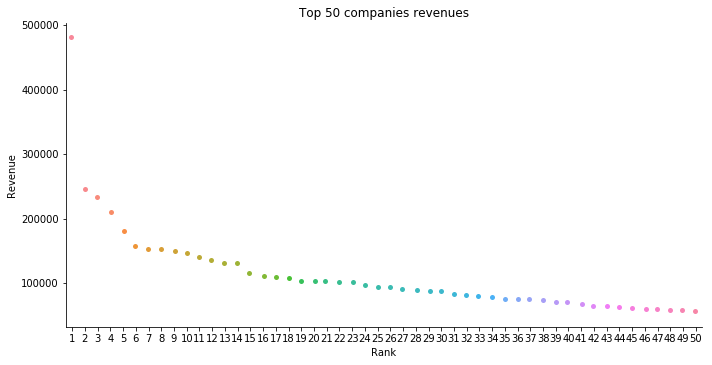

In [32]:
# Categorical Relationship
sns.catplot(x="Rank", y="Revenue", data=top_50_companies,aspect=2);
plt.title('Top 50 companies revenues')
plt.show()

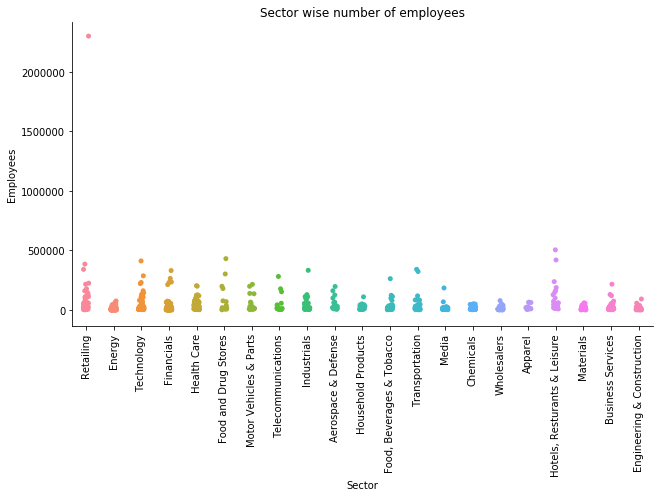

In [33]:
sns.catplot(x="Sector", y="Employees", data=fortune_df,aspect=2)
plt.xticks(rotation=90)
plt.title('Sector wise number of employees')
plt.show()

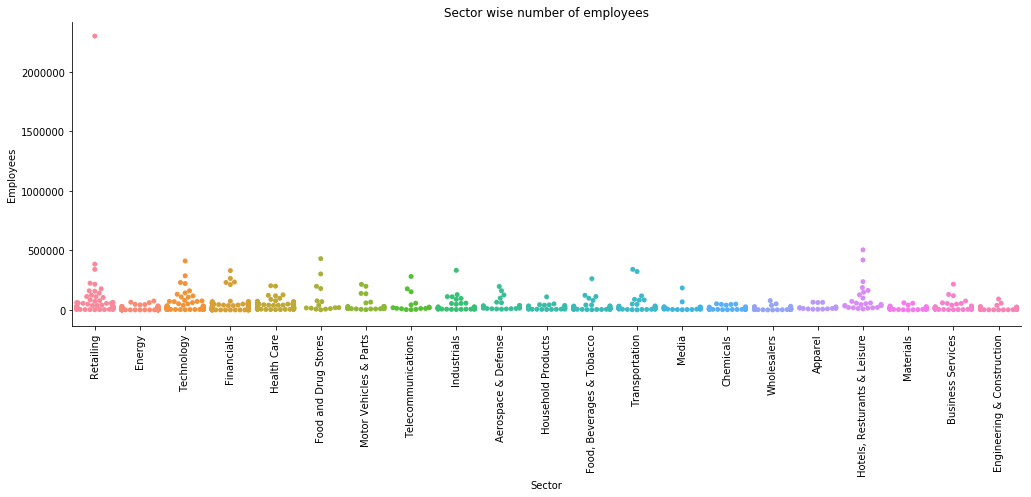

In [34]:
sns.catplot(x="Sector", y="Employees",kind="swarm", data=fortune_df,aspect=3)
plt.xticks(rotation=90)
plt.title('Sector wise number of employees')
plt.show()

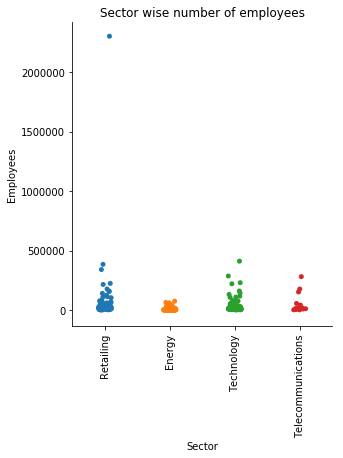

In [35]:
sns.catplot(x="Sector", y="Employees",order=["Retailing","Energy","Technology","Telecommunications"], data=fortune_df)
plt.xticks(rotation=90)
plt.title('Sector wise number of employees')
plt.show()

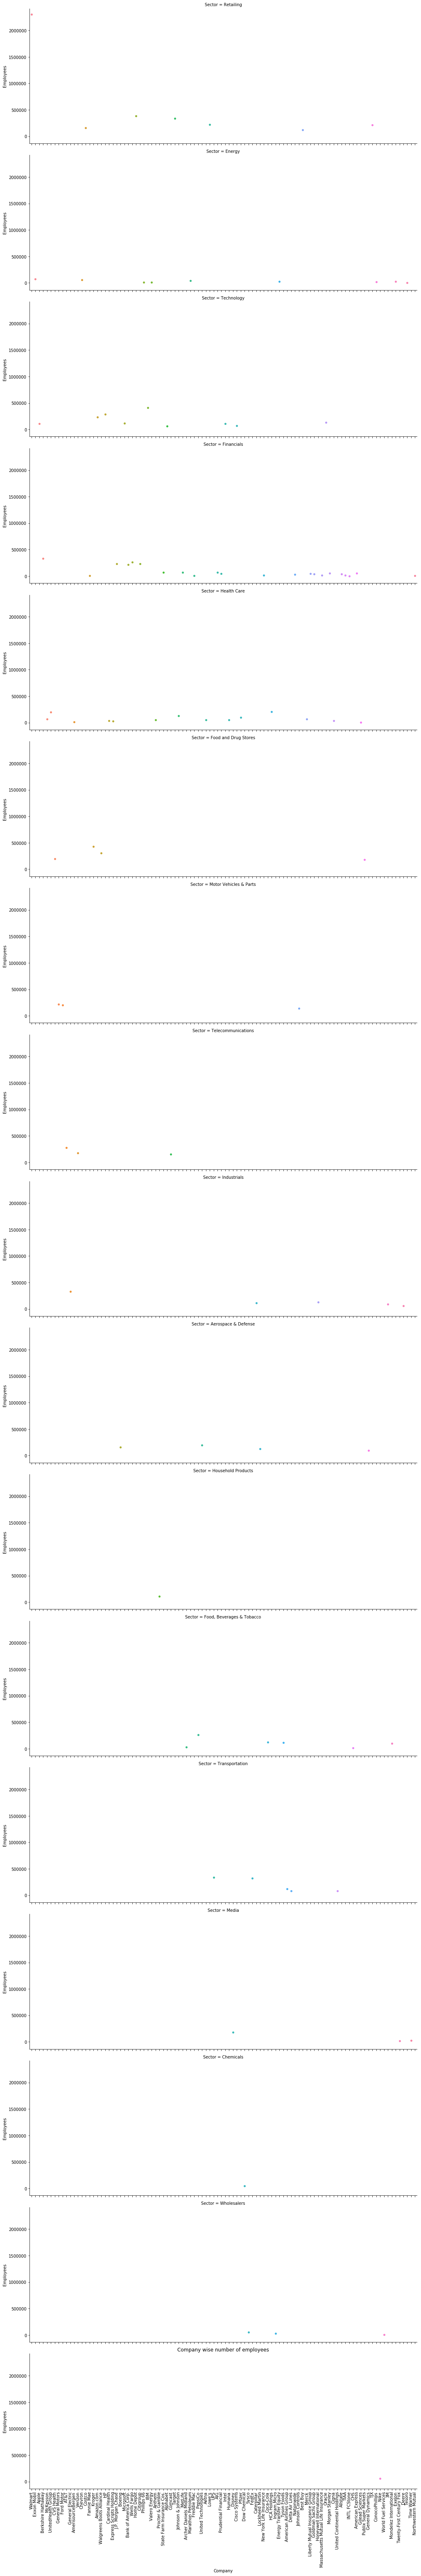

In [36]:
top_100_cos = fortune_df[0:100]
sns.catplot(x="Company", y="Employees",kind="swarm", row="Sector",aspect=3, data=top_100_cos)
plt.xticks(rotation=90)
plt.title('Company wise number of employees')
plt.show()

In [37]:
fortune_df['Employees'].max()
# fortune_df['Employees'].min()

2300000

Box plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

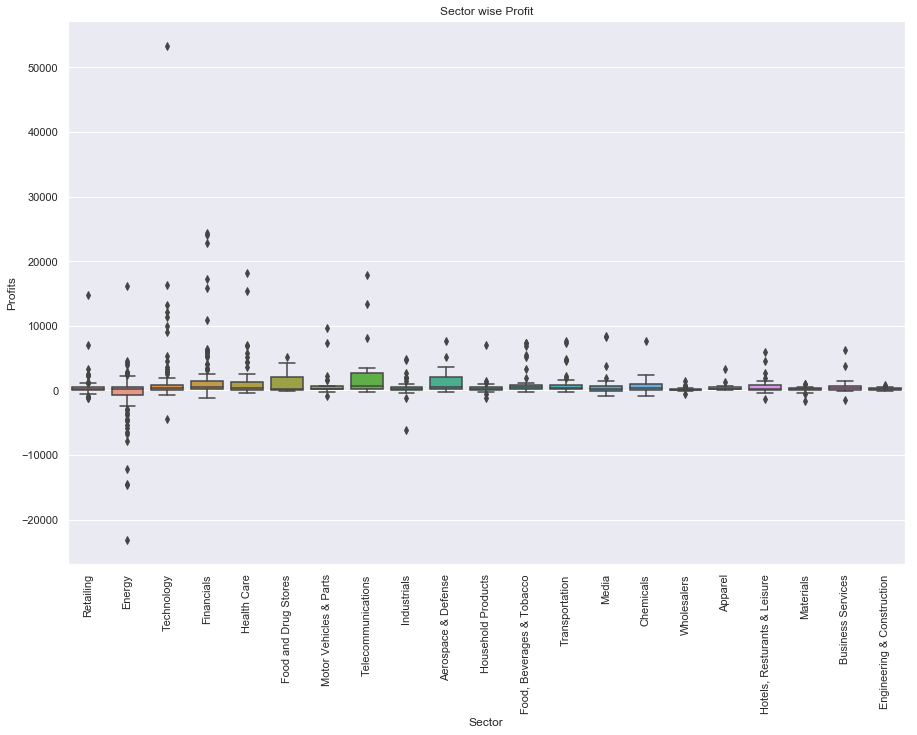

In [38]:
# fig,ax = plt.subplot()
sns.set(rc={'figure.figsize':(15,10)})
# plt.ylim(52, 2300000,300000)
ax = sns.boxplot(x="Sector", y="Profits", data=fortune_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Sector wise Profit')
plt.show()

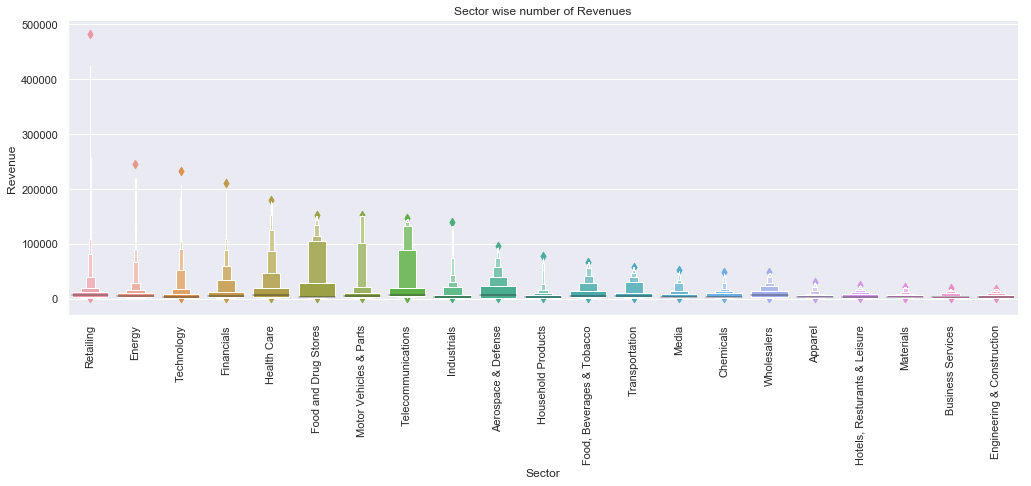

In [39]:
# It is best suited for larger datasets
graph = sns.catplot(x="Sector", y="Revenue", kind="boxen",data=fortune_df,aspect=3)
graph.set_xticklabels(rotation=90)
plt.title('Sector wise number of Revenues')
plt.show()

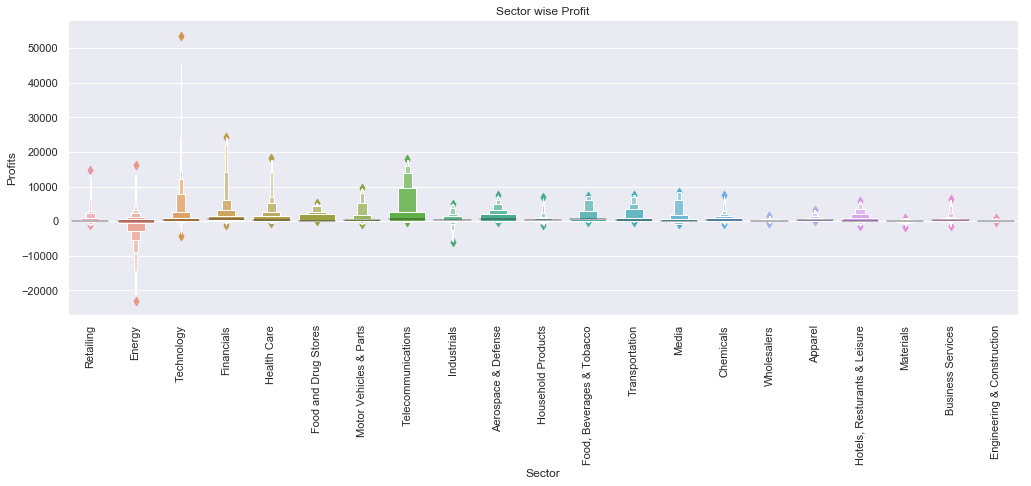

In [40]:
graph = sns.catplot(x="Sector", y="Profits", kind="boxen",data=fortune_df,aspect=3)
graph.set_xticklabels(rotation=90)
plt.title('Sector wise Profit')
plt.show()

Violin uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

C:\Users\pansh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


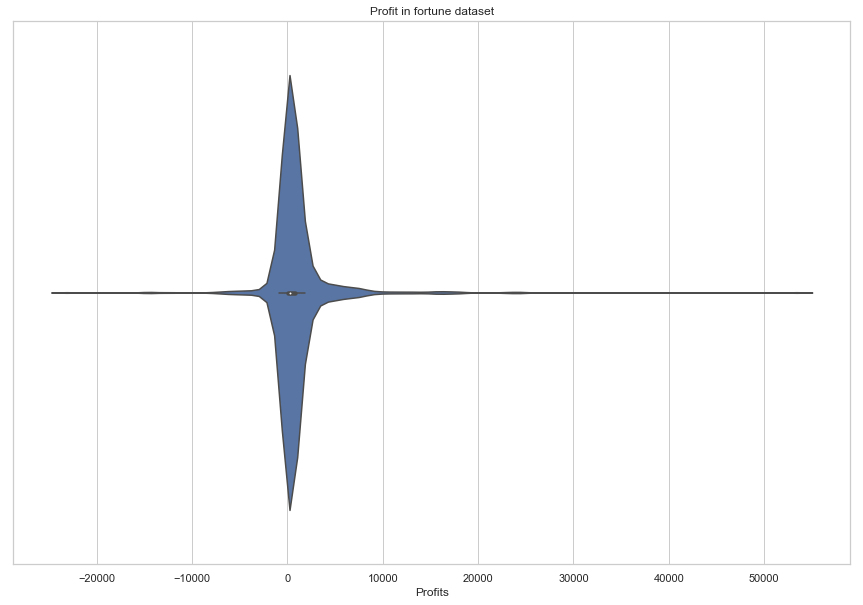

In [41]:
sns.set(style="whitegrid")
sns.violinplot(x=fortune_df["Profits"])
plt.title('Profit in fortune dataset')
plt.show()

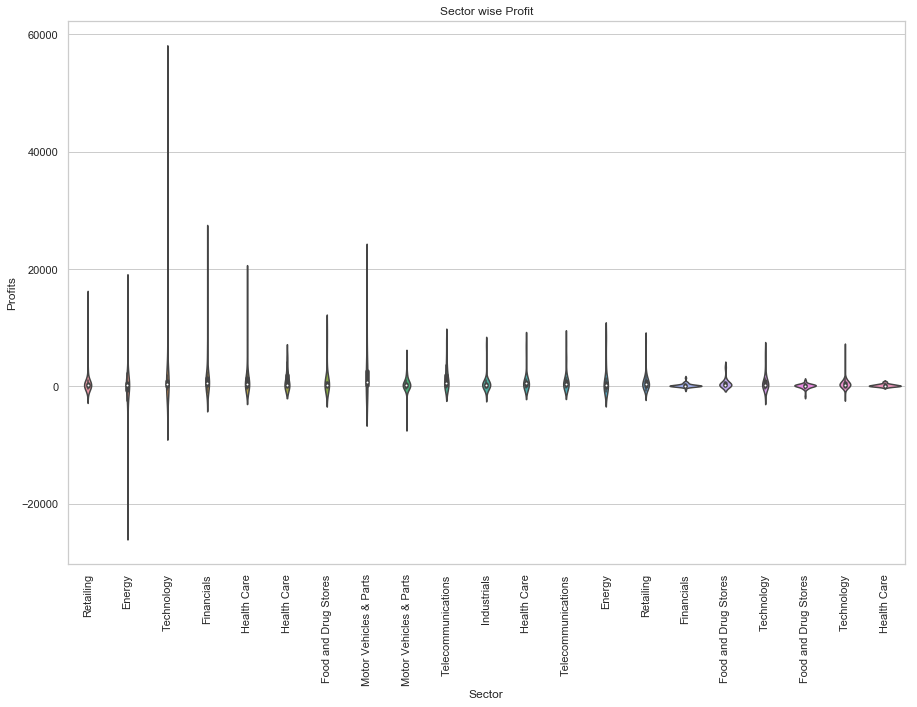

In [42]:
graph = sns.violinplot(x="Sector", y="Profits",data=fortune_df,aspect=4)
graph.set_xticklabels(rotation=90,labels=fortune_df['Sector'])
plt.title('Sector wise Profit')
plt.show()

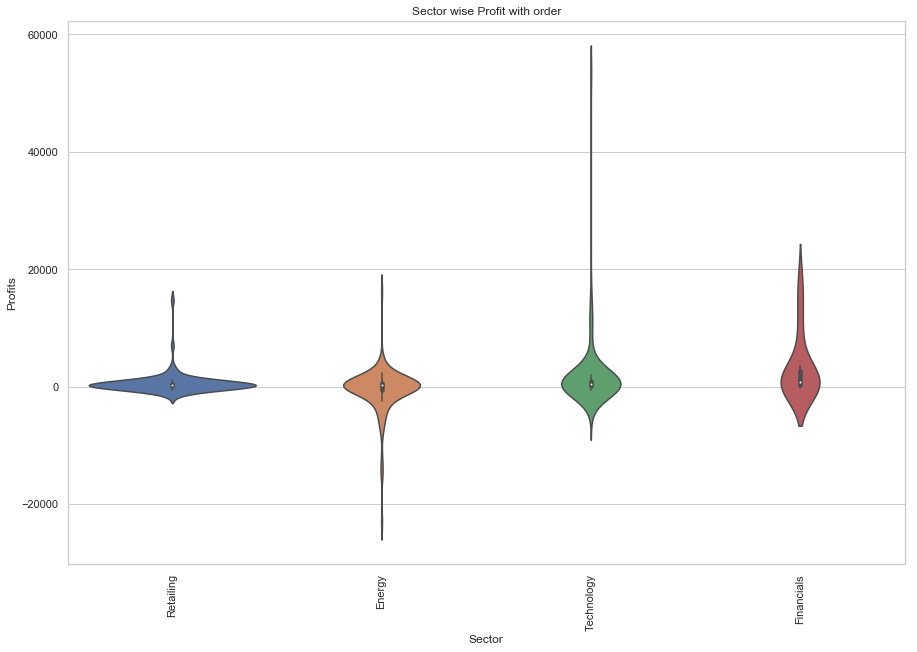

In [43]:
# order=["Retailing","Energy","Technology","Telecommunications"]
graph = sns.violinplot(x="Sector", y="Profits", order=["Retailing","Energy","Technology","Telecommunications"],data=fortune_df,aspect=4)
graph.set_xticklabels(rotation=90,labels=fortune_df['Sector'])
plt.title('Sector wise Profit with order')
plt.show()

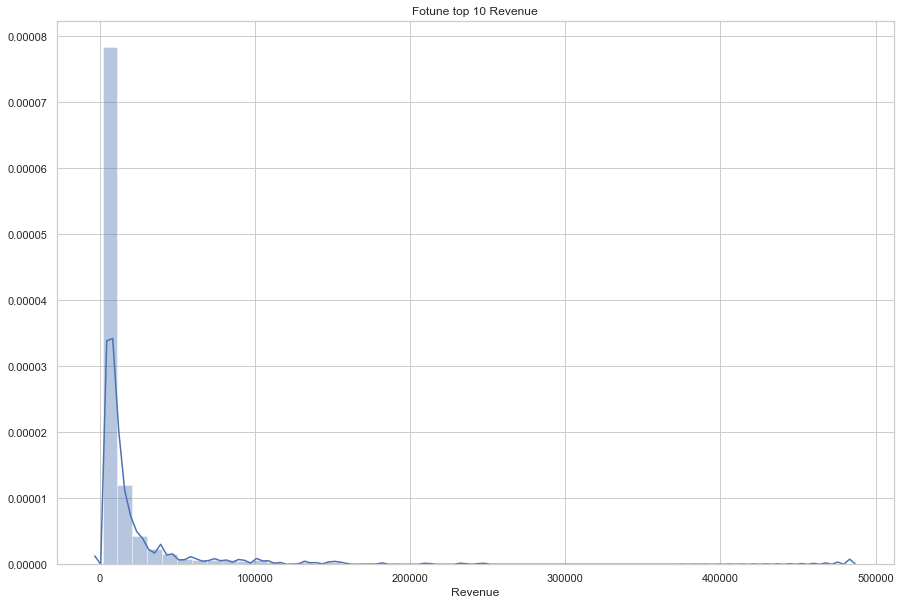

In [44]:
plt.title('Fotune top 10 Revenue')
sns.set(rc={'figure.figsize':(25,5)})
sns.distplot(fortune_df["Revenue"])
plt.show()

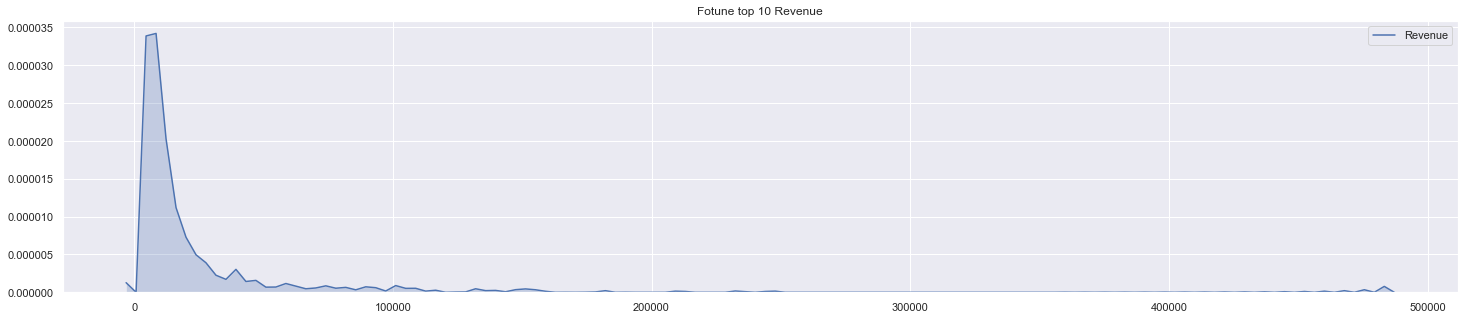

In [45]:
plt.title('Fotune top 10 Revenue')
sns.set(rc={'figure.figsize':(25,5)})
sns.kdeplot(fortune_df["Revenue"],shade=True)
plt.show()

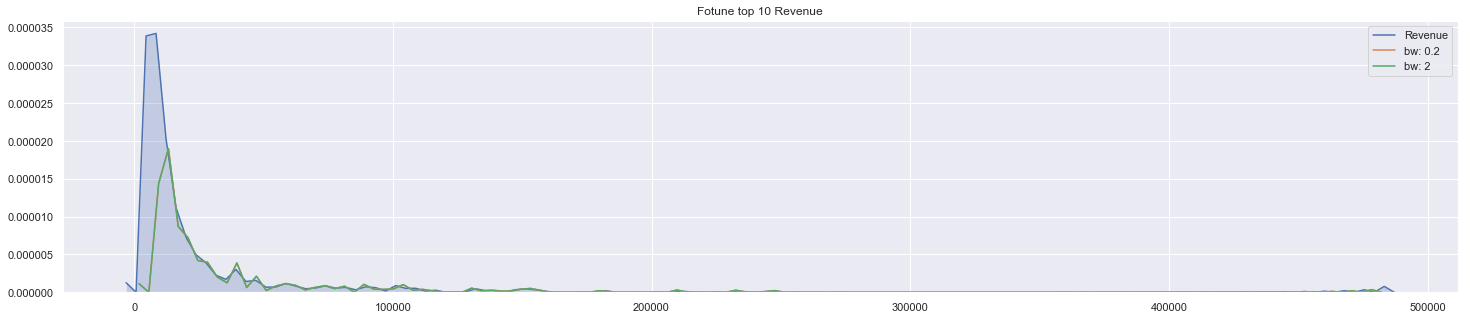

In [46]:
plt.title('Fotune top 10 Revenue')
sns.set(rc={'figure.figsize':(25,20)})
sns.kdeplot(fortune_df["Revenue"],shade=True)
sns.kdeplot(fortune_df["Revenue"], bw=.2, label="bw: 0.2")
sns.kdeplot(fortune_df["Revenue"], bw=2, label="bw: 2")
plt.legend();

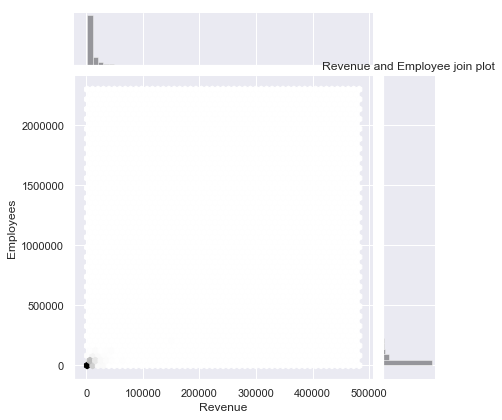

In [47]:
sns.jointplot(x="Revenue", y="Employees",data=fortune_df, kind="hex", color="k")
plt.title('Revenue and Employee join plot - Hex')
plt.show()

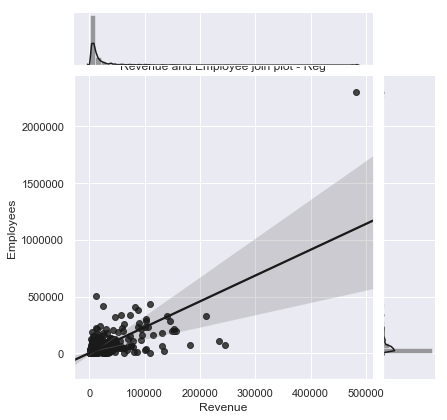

In [49]:
sns.jointplot(x="Revenue", y="Employees",data=fortune_df, kind="reg", color="k")
plt.title('Revenue and Employee join plot - Reg')
plt.show()

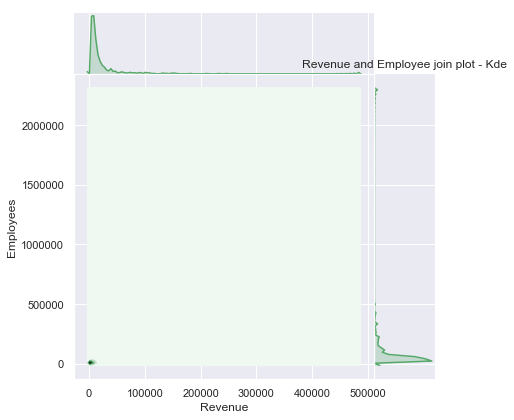

In [50]:
sns.jointplot(x="Revenue", y="Employees",data=fortune_df, kind="kde",  space=0, color="g")
plt.title('Revenue and Employee join plot - Kde')
plt.show()

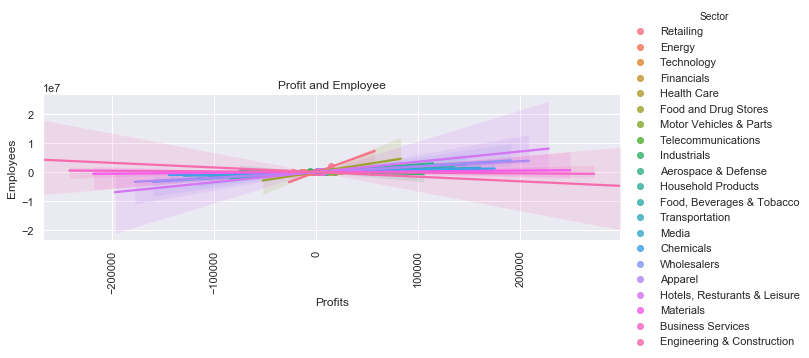

In [51]:
lm_graph = sns.lmplot(x="Profits", y="Employees",hue="Sector",data=fortune_df,aspect=3,height=3)
# lm_graph.set_xticklabels(rotation=90,labels=fortune_df['Sector'])
plt.xticks(rotation=90)
plt.title('Profit and Employee')
plt.show()

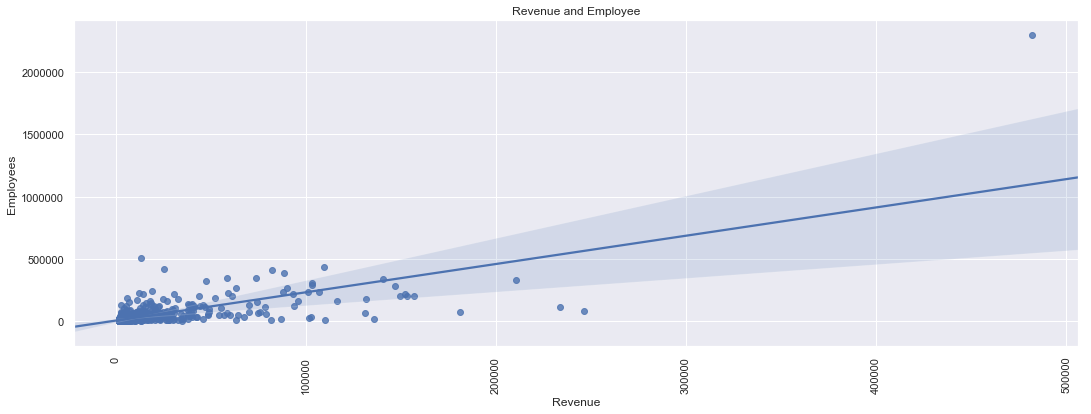

In [52]:
f, ax = plt.subplots(figsize=(18, 6))
reg_graph = sns.regplot(x="Revenue", y="Employees",data=fortune_df)
plt.xticks(rotation=90)
plt.title('Revenue and Employee')
plt.show()